## **About YULU**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.

Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.

## Problem Statement:

Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can tailor their services and strategies accordingly  to regain proﬁtability.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
!gdown 1aP-puVXY189uXzwzdYEKi_JReojAOVsd

Downloading...
From: https://drive.google.com/uc?id=1aP-puVXY189uXzwzdYEKi_JReojAOVsd
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 113MB/s]


In [ ]:
df=pd.read_csv("bike_sharing.csv")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Column Proﬁling:
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday : whether day is a holiday or not
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
  * 1: Clear, Few clouds, partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds
  * 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered.

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* The dataset has  10886 entries, 0 to 10885 with 12 columns.
* There is no duplicated rows or missing values.
* The  column datetime has object datatype. It is to be changed to datetime dtype for date and time analysis.
* Columns season, holiday, workingday and weather are categorical columns. Thus, changing their dtype to object.

In [ ]:
df["datetime"]= pd.to_datetime(df["datetime"])

In [ ]:
columns=["season","holiday","workingday","weather"]
for i in columns:
  df[i]=df[i].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


* Concerned columns dtpyes are changed acoordingly.

In [ ]:
df["Date"]=(df["datetime"].dt.date).astype("str")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01


In [ ]:
df["Month"]=(df["datetime"].dt.month).astype("str")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1


In [ ]:
Month_order=df.Month.unique()
Month_order

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [ ]:
df["Day"]=(df["datetime"].dt.day).astype("str")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1


In [ ]:
df["Day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'], dtype=object)

In [ ]:
df["Year"]=(df["datetime"].dt.year).astype("str")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Month,Day,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,2011


In [ ]:
df.Year.unique()

array(['2011', '2012'], dtype=object)

In [ ]:
df["Hour"]=(df["datetime"].dt.time).astype("str")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Month,Day,Year,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,2011,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,2011,01:00:00


In [ ]:
df["Hour"].unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [ ]:
df["Hour"]=df["Hour"].str.split(":")
df["Hour"]=(pd.DataFrame(df["Hour"].tolist())[0]).astype(int)
df["Hour"]=df["Hour"].astype(str)
df["Hour"][:5]
Hour_order=df["Hour"].unique()

* After changing dtype of datetime to datetime, Day, Month, Year and Hour are extracted from datetime.
* The number of day is till 19 only which is surprising.

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* "humidity" has outlier on minimum side as min value is quite less than 25%.
* "windspeed","causal", "registered" and "count" have outliers as their max values are larger than their respective 75%.


In [ ]:
df.describe(include="object")

,season,holiday,workingday,weather,Date,Month,Day,Year,Hour
count,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,456,12,19,2,24
top,4,0,1,1,2011-01-01,5,1,2012,12
freq,2734,10575,7412,7192,24,912,575,5464,456


* season 4 (Winter) seems to have mode for number of bike rented.
* Most of the days are working days (holiday =0 and workingday=1).
* Most of the days have claer weather (weather condition 1).
* May is mode for month for number of bike rented. This contradicts Winter season.
* It is surpursing the number of days in month unique values are only 19. There are 30 or 31 days in a month.

## **Univariate Analysis:**

In [ ]:
holiday=df.holiday.value_counts(ascending=False, normalize=True)*100
holiday

0    97.14312
1     2.85688
Name: holiday, dtype: float64

* Only 3% of total days in dataset are holidays (festivies or natioanl holidays).
* Rest 97% is either working day or weekend.

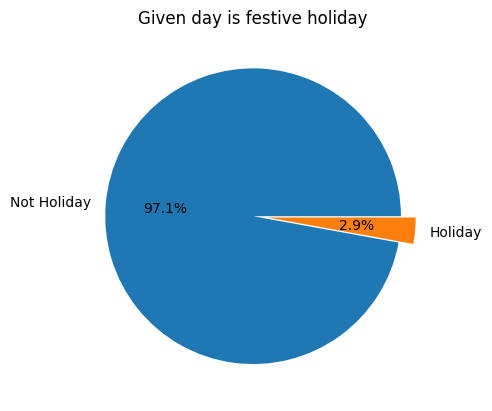

In [ ]:
plt.pie(holiday,labels=["Not Holiday", "Holiday"],autopct= '%1.1f%%', explode=[0,0.1])
plt.title("Given day is festive holiday")
plt.show()

In [ ]:
working_day=df.workingday.value_counts(ascending=False, normalize=True)*100
working_day

1    68.087452
0    31.912548
Name: workingday, dtype: float64

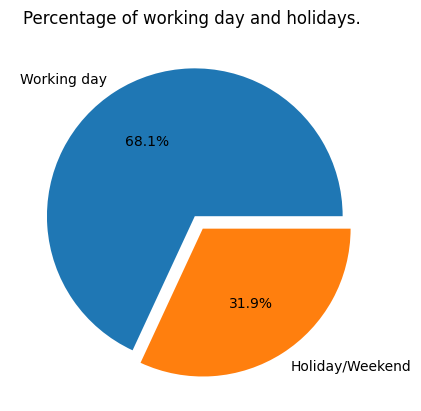

In [ ]:
plt.pie(working_day,labels=["Working day", "Holiday/Weekend"],autopct= '%1.1f%%', explode=[0,0.1])
plt.title("Percentage of working day and holidays. ")
plt.show()


* Bikes are rented on working days for 68% of dataset.
* Bikes are rented on non working days (holidays and weekends) for 32% of dataset.

In [ ]:
seasons_contribution = df.season.value_counts(ascending=False, normalize=True)*100
seasons_contribution

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

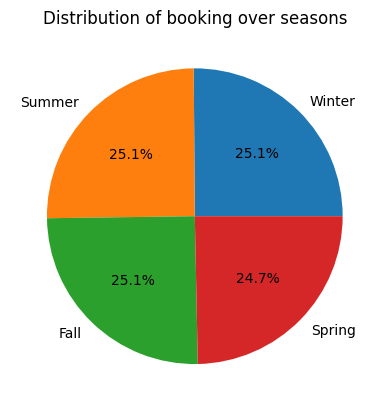

In [ ]:
plt.pie(seasons_contribution,labels=["Winter", "Summer","Fall","Spring"],autopct= '%1.1f%%')
plt.title("Distribution of booking over seasons")
plt.show()

* Number of days for each season is almost same.

In [ ]:
weather=df.weather.value_counts(normalize=True)
weather

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

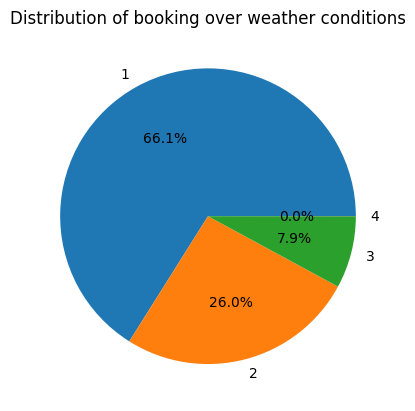

In [ ]:
plt.pie(weather.values,labels=weather.index,autopct= '%1.1f%%')
plt.title("Distribution of booking over weather conditions")
plt.show()

* Weather condition 4 (Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog) is bad for bike travel and hence there is null contribution in bike renting as suspected.

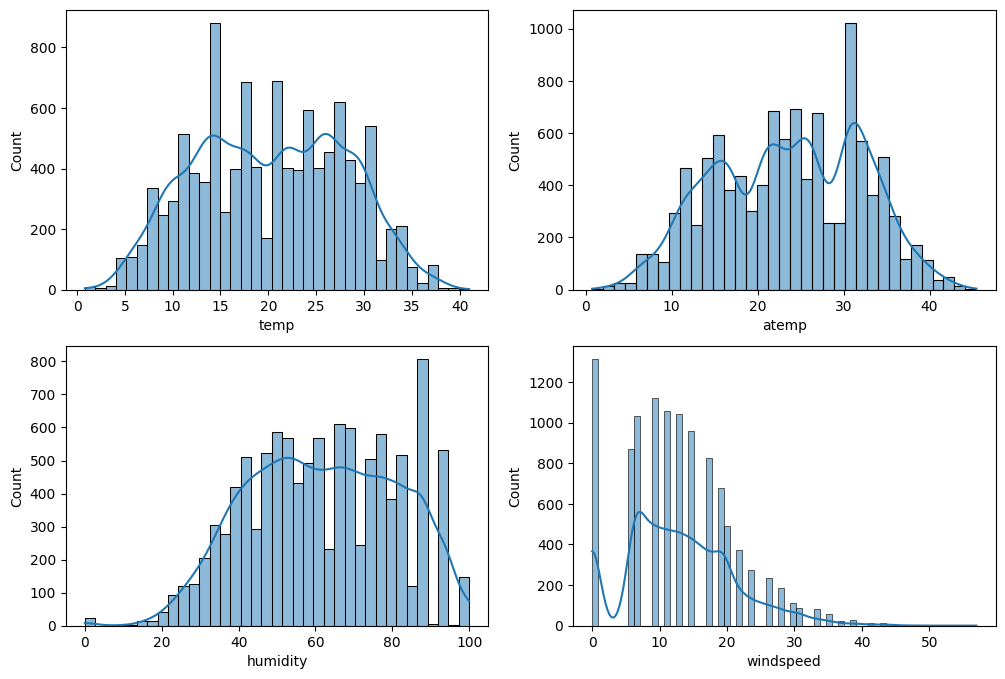

In [ ]:
num_cols=["temp","atemp","humidity","windspeed"]

fig=plt.figure(figsize=(12,8))

for i in range(len(num_cols)):
  plt.subplot(2,2,i+1)
  sns.histplot(data=df,x=num_cols[i],kde=True)

plt.show()


* The distribution for temperture (temp) and feeling temperature(atemp)  are almost similar. So analysis can be done on any one of them.
* atemp can be dropped from the datset.   


In [ ]:
df.drop(columns="atemp",inplace=True)
df.head(2)
num_cols=["temp","humidity","windspeed"]

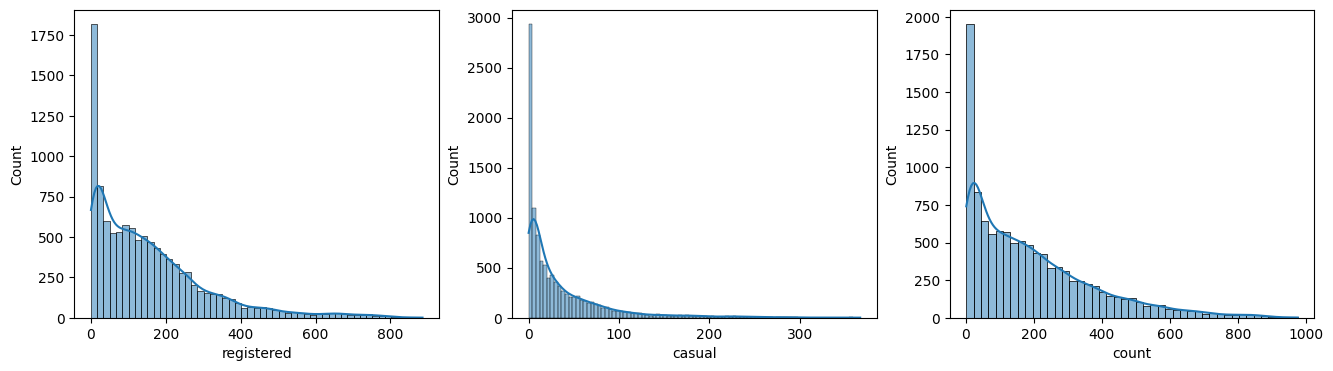

In [ ]:
bikes_count=["registered","casual","count"]

fig=plt.figure(figsize=(16,4))

for i in range(len(bikes_count)):
  plt.subplot(1,3,i+1)
  sns.histplot(data=df,x=bikes_count[i],kde=True)

plt.show()

* Distribution of bikes rented by "registered" and "casual"  and for "count" (which is sum of "registered" and "casual") are same suggesting there is not much difference in demand based on membership.
* Hence only "count" can be used for analysis.

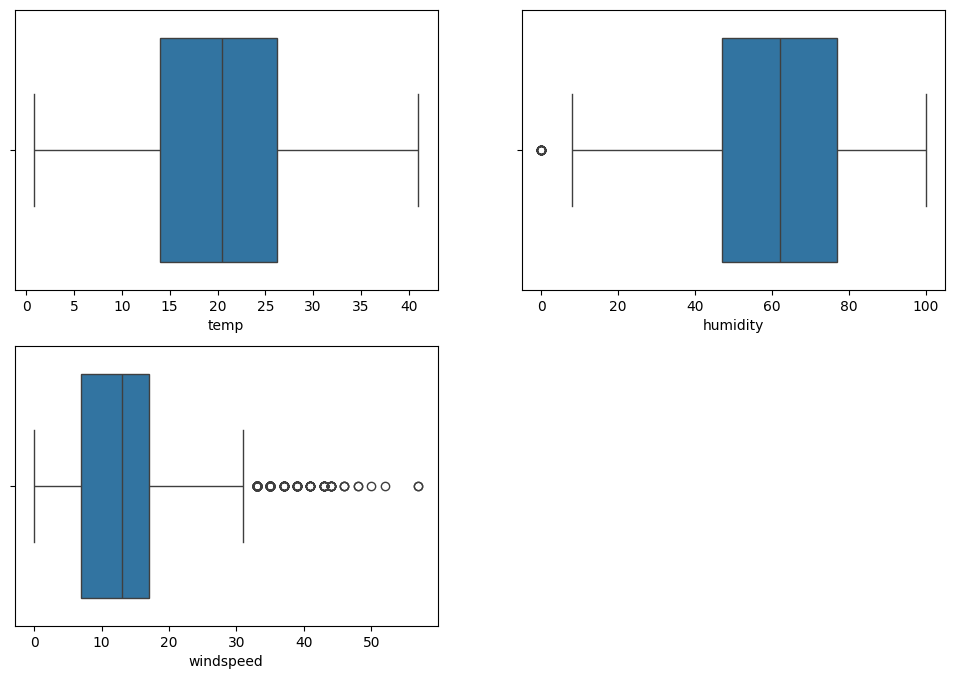

In [ ]:
fig=plt.figure(figsize=(12,8))

for i in range(len(num_cols)):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=df[num_cols[i]])
plt.show()

* humidity and windspeed has outliers.
* There are outliers in windspeed suggesting speed of wind is quite high on some days.

## **Bivariate Analysis:**

In [ ]:
season=df.groupby("season")["count"].mean().sort_values(ascending=False)
season

season
3    234.417124
2    215.251372
4    198.988296
1    116.343261
Name: count, dtype: float64

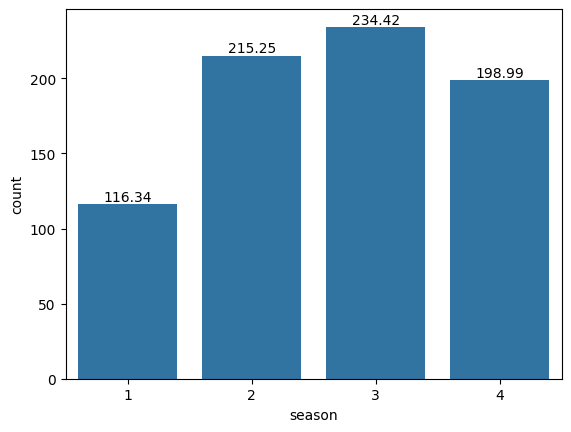

In [ ]:
ax=sns.barplot(data=df, x="season",y="count",errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f',fontsize=10)
plt.show()

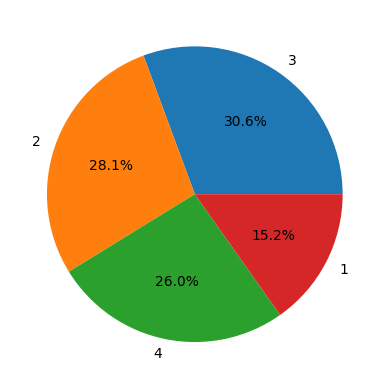

In [ ]:
plt.pie(season.values, labels=season.index,autopct= '%1.1f%%',normalize=True)
plt.show()

* There seems to be difference in bikes rented in different seasons.
* Highest number of bikes are rented in Fall. This may be due to scenic beauty is most in Fall season.
* Summer also has high average of bikes rented.
* Least bikes are rented for Spring.

In [ ]:
season_casual_rides=df.groupby("season").casual.mean().sort_values(ascending=False)
season_casual_rides

season
3    52.220271
2    47.446762
4    28.580834
1    15.489576
Name: casual, dtype: float64

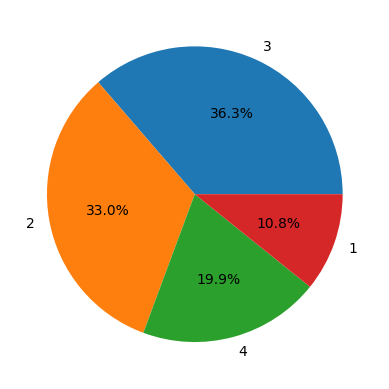

In [ ]:
plt.pie(season_casual_rides.values, labels=season_casual_rides.index,autopct= '%1.1f%%',normalize=True)
plt.show()

In [ ]:
season_registered_rides=df.groupby("season").registered.mean().sort_values(ascending=False)
season_registered_rides

season
3    182.196853
4    170.407462
2    167.804610
1    100.853686
Name: registered, dtype: float64

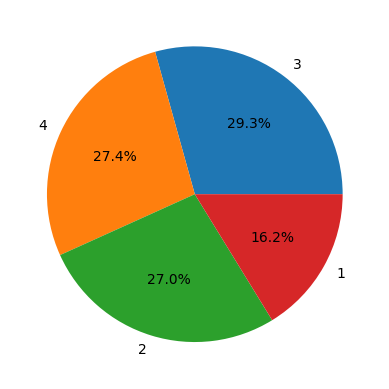

In [ ]:
plt.pie(season_registered_rides.values, labels=season_registered_rides.index,autopct= '%1.1f%%',normalize=True)
plt.show()

In [ ]:
df_month=df.groupby("Month")["count"].mean().reset_index()
df_month["count"].sort_values(ascending=False)[:10]

8     242.031798
9     235.325658
10    234.118421
11    233.805281
1     227.699232
7     219.459430
2     193.677278
6     184.160616
3     175.614035
5     148.169811
Name: count, dtype: float64

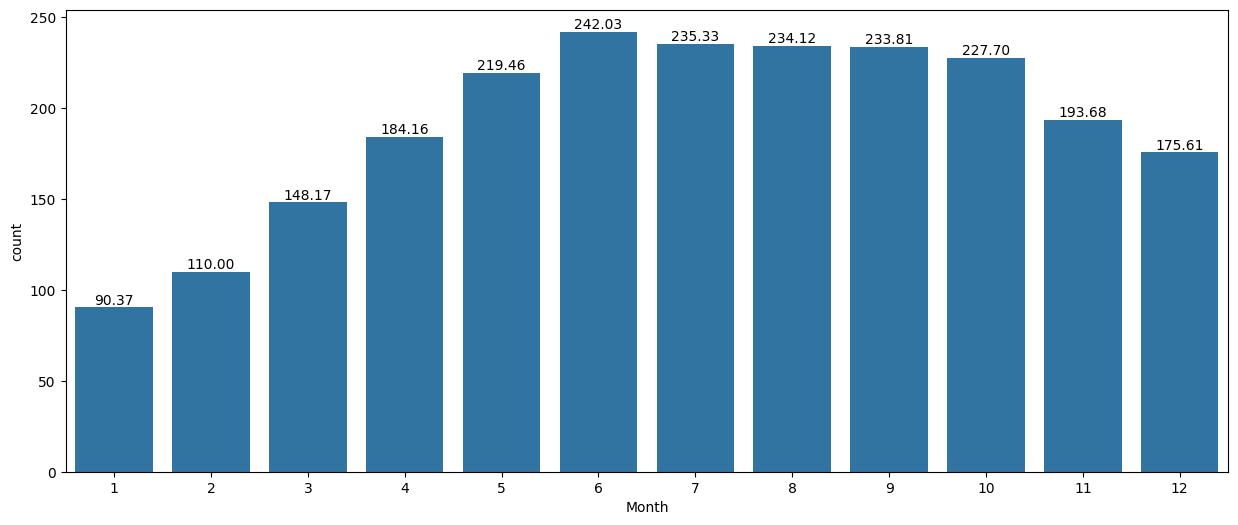

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=df_month,x="Month", y="count", order=Month_order)
ax.bar_label(ax.containers[0], fmt='%.2f',fontsize=10)
plt.show()

* It is visible from the graph for Fall season (months July , August and September), the number of bikes is higher than for other seasons.
* For Summer season, June is most contributing month.

In [ ]:
df_hour=df.groupby("Hour")["count"].mean().reset_index()
df_hour["count"].sort_values(ascending=False)[:10]

9     468.765351
10    430.859649
22    362.769231
8     316.372807
11    315.278509
5     257.787281
4     256.508772
7     254.298246
6     243.442982
13    228.517544
Name: count, dtype: float64

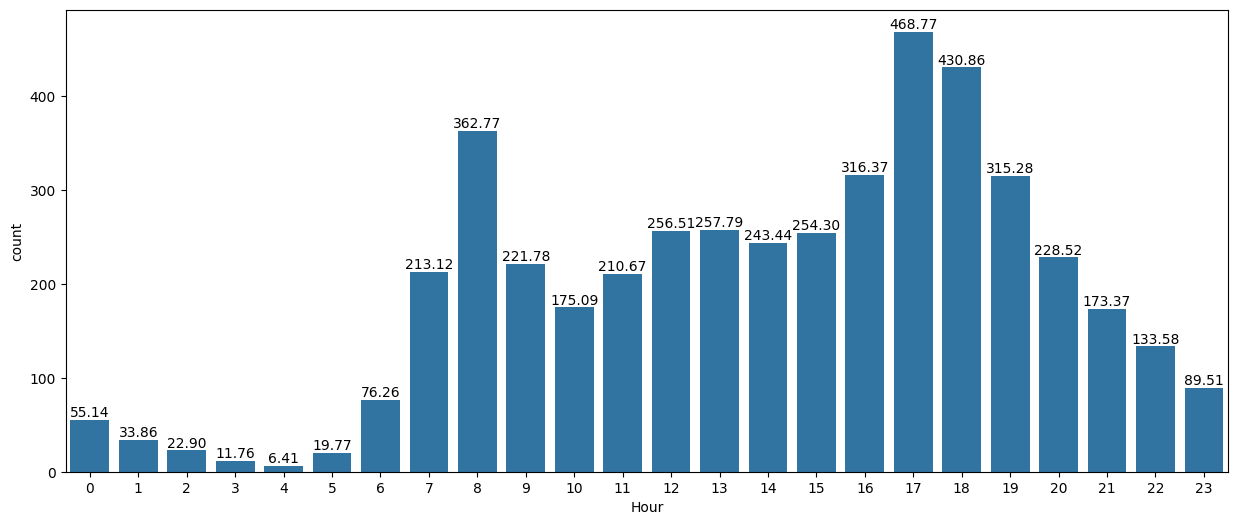

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=df_hour,x="Hour", y="count",order=Hour_order)
ax.bar_label(ax.containers[0], fmt='%.2f',fontsize=10)
plt.show()

* Traffic is usually starts from morning 6 am.
* In mornings, 8 am is busiest hour (office start time).
* For noon and afternoon period, average traffic is there.
* From 5 pm, the traffic starts increasing again with peak hours 5 pm and 6 pm.
* Late night traffic is higher than early morning traffic.

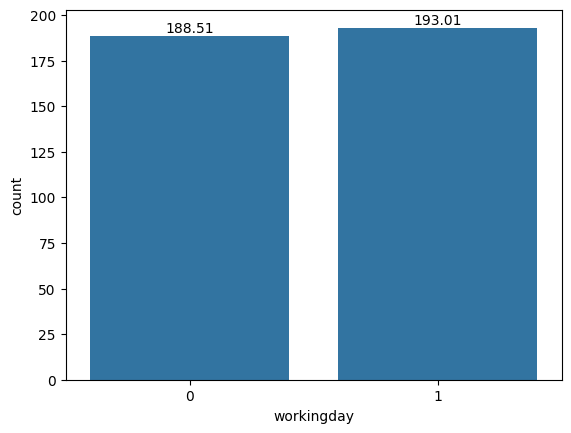

In [ ]:
ax=sns.barplot(data=df,x="workingday",y="count",errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f',fontsize=10)
plt.show()

* Traffic is almost same for working day and holiday(weekend included).

In [ ]:
df1=df[num_cols]
df1["count"]=df["count"]
corr_mat=df.corr()
corr_mat

,temp,humidity,windspeed,casual,registered,count
temp,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


<Axes: >

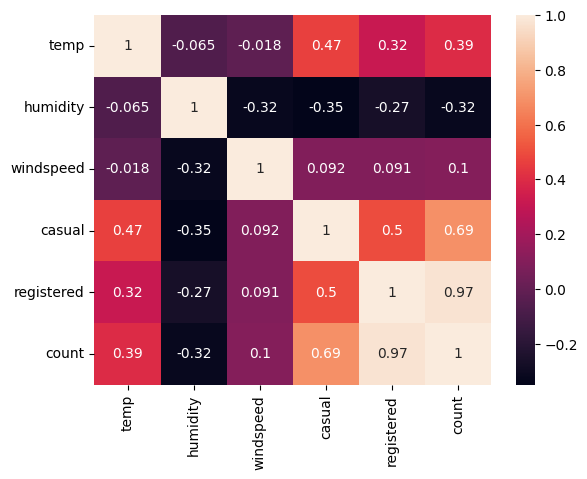

In [ ]:
sns.heatmap(corr_mat,annot=True)

* There is no correlation between "temperature", "humidity" and "windspeed".
* There is positive correaltion between "registered" and "count".
* There is positive correaltion between
"casual" and "count".
* "causal" and "registered" are also positively correlated.

### **Hypothesis Testing 1:**
If there any signiﬁcant difference between the no. of bike rides on Weekdays and Weekends?

**H0: There is no difference in number of bikes rented on a weekdays and weekends.**

**H1: There is significant difference in number of bikes rented on a weekdays and weekends.**

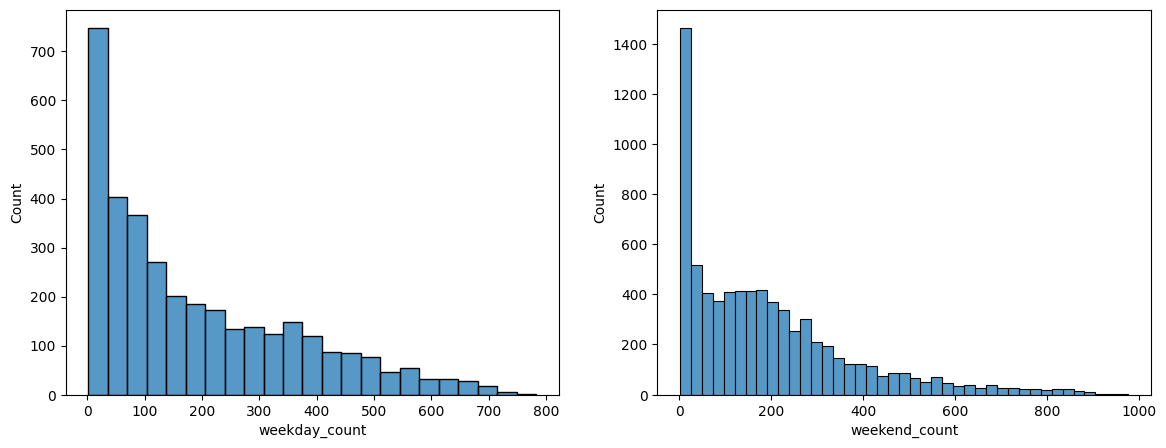

In [ ]:
# signiﬁcant difference between the no. of bike rides on Weekdays and Weekends?

weekday_count=df[df["workingday"]==0]["count"]
weekend_count=df[df["workingday"]==1]["count"]

weekday_or_not=[weekday_count,weekend_count]
weekday_or_not_list=["weekday_count","weekend_count"]
fig=plt.figure(figsize=(14,5))

for i in range(len(weekday_or_not)):
  plt.subplot(1,2,i+1)
  sns.histplot(data=weekday_or_not[i])
  plt.xlabel(weekday_or_not_list[i])
plt.show()

Since the data we have is a sample data (not population data), we will assume population data to be gaussian distributed. We have to check whether average number of bikes rented for both weekdays and weekends is same or not, we will be using 2 sample t-test.  

In [ ]:
alpha=0.05
t_stat, p_value= stats.ttest_ind(weekday_count,weekend_count)
print("T-test stats :",t_stat)
print("p_value      :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented on weekdays and weekends.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in number of bikes rented\
  on weekdays and weekends.")

T-test stats : -1.2096277376026694
p_value      : 0.22644804226361348
Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in number of bikes rented  on weekdays and weekends.


* There is not significant evidence to suggest difference in number of bikes rented  on weekdays and weekends.
* There is no point for waiting for particular days (weekends or weekdays) for bike repairing and maintence.
* Bikes should be charged and serviced for better customer experience during low demand hours ( 12 am to 4 am) as the bikes demands speeds up from 6 am and is there through the day.

###**Hypothesis Testing 2**:
If the demand of bicycles on rent is the same for different Weather conditions?

**H0: The demand of bicycles on rent is the same for different Weather conditions.**

**H1: The demand of bicycles on rent is the differnt for atleast one Weather condition.**

In [ ]:
# if the demand of bicycles on rent is the same for different Weather conditions?
Clear_weather=df[df["weather"]==1]["count"]
Mist_weather=df[df["weather"]==2]["count"]
Light_Snow_weather=df[df["weather"]==3]["count"]
Heavy_Rain_weather=df[df["weather"]==4]["count"]

Since the data we have is a sample data (not population data), we will assume population data to be gaussian distributed. We have to check whether average number of bikes rented for different weather conditions is same or not, we will be using 1 sample Anova test as there are 4 categories.

But before applying Anova, we will have to check for normality and equal variances of each weather condition set.

Histogram, QQ-plot and Shapiro-Wilk test are used to check normality and Levene' test is used to check for equal variances.

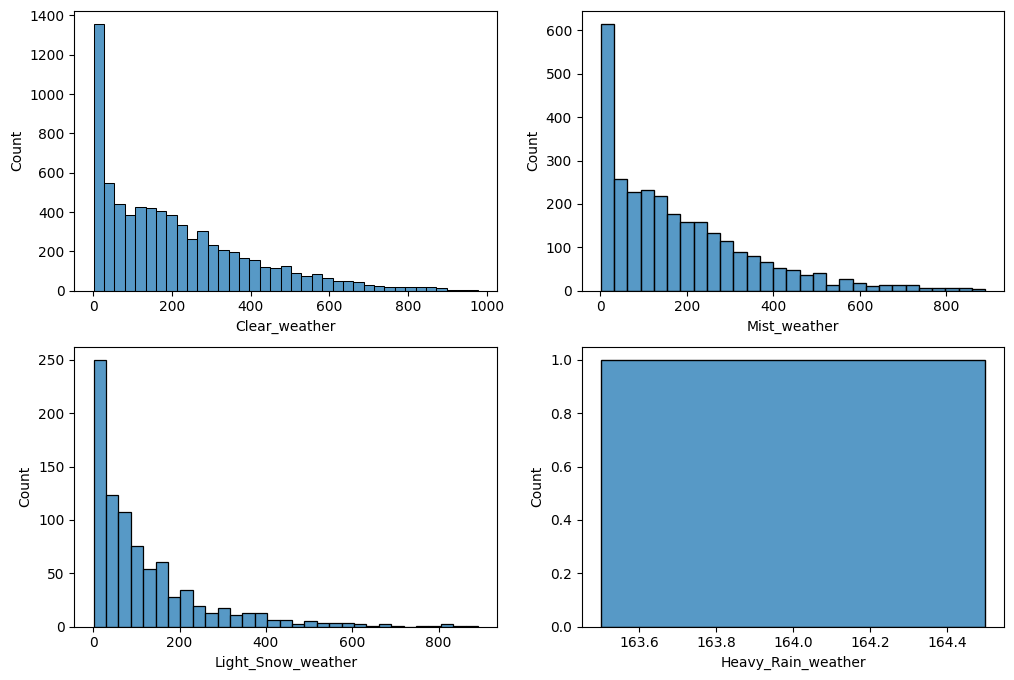

In [ ]:
weather_conditions=[Clear_weather,Mist_weather,Light_Snow_weather,Heavy_Rain_weather]
weather_conditions_list=["Clear_weather","Mist_weather","Light_Snow_weather","Heavy_Rain_weather"]
fig=plt.figure(figsize=(12,8))
for i in range(len(weather_conditions)):
  plt.subplot(2,2,i+1)
  sns.histplot(data=weather_conditions[i])
  plt.xlabel(weather_conditions_list[i])
plt.show()

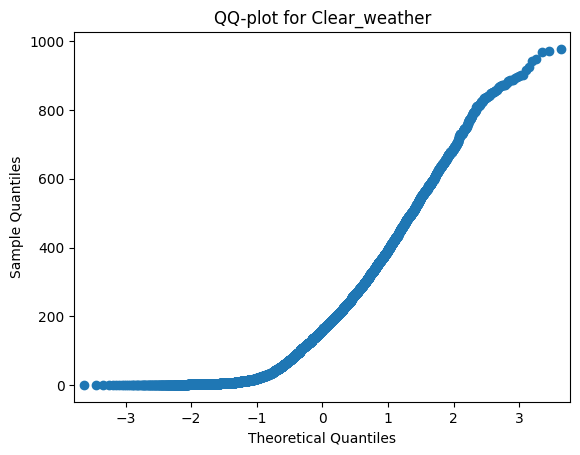

In [ ]:
sm.qqplot(data=Clear_weather)
plt.title("QQ-plot for Clear_weather")
plt.show()

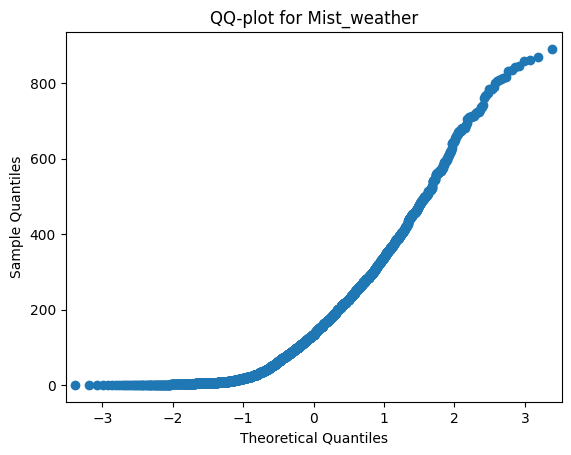

In [ ]:
sm.qqplot(data=Mist_weather)
plt.title("QQ-plot for Mist_weather")
plt.show()

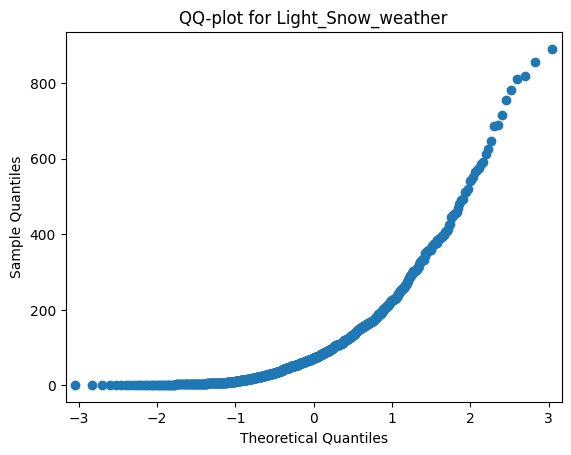

In [ ]:
sm.qqplot(data=Light_Snow_weather)
plt.title("QQ-plot for Light_Snow_weather")
plt.show()

In [ ]:

for i in range(len(weather_conditions)-1):

  sharpiro_stats, p_value =stats.shapiro(weather_conditions[i])
  print(f"Sharpiro_stats and p_value for {weather_conditions_list[i]}:",sharpiro_stats, p_value )
  skew=weather_conditions[i].skew()
  print(f"Skewness for {weather_conditions_list[i]}:",skew)
  kurt=weather_conditions[i].kurtosis()
  print(f"Kurtosis for {weather_conditions_list[i]}:",kurt,"\n")
  print()

Sharpiro_stats and p_value for Clear_weather: 0.8909230828285217 0.0
Skewness for Clear_weather: 1.1398572666918205
Kurtosis for Clear_weather: 0.964719852310354 


Sharpiro_stats and p_value for Mist_weather: 0.8767687082290649 9.781063280987223e-43
Skewness for Mist_weather: 1.294444423357868
Kurtosis for Mist_weather: 1.5884304891319174 


Sharpiro_stats and p_value for Light_Snow_weather: 0.7674332857131958 3.876090133422781e-33
Skewness for Light_Snow_weather: 2.1871371080456594
Kurtosis for Light_Snow_weather: 6.003053730759276 




In [ ]:
Levene_Result= stats.levene(Clear_weather,Mist_weather,Light_Snow_weather,Heavy_Rain_weather)
print("Levene_Result for all weather conditions:", Levene_Result)

Levene_Result for all weather conditions: LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)


Although parameters for normality and equal variances are not met, we will be continuing our hypothesis testing with Anova.

In [ ]:
alpha=0.05
f_stat, p_value= stats.f_oneway(Clear_weather,Mist_weather,Light_Snow_weather,Heavy_Rain_weather)
print("F-test stats :",f_stat)
print("p_value      :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for atleast one of the weather conditions.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for different weather conditions.")

F-test stats : 65.53024112793271
p_value      : 5.482069475935669e-42
Null Hypothesis Rejected. There is significant difference in number of bikes rented for atleast one of the weather conditions.


Since there is only single entry for weather condition 4 (Heavy_Rain_weather),
we won't be considering weather condition Heavy_Rain_weather.

We will check for Clear_weather, Mist_weather and Light_Snow_weather only and will try to find whether number of bikes for remaining condition is same.

In [ ]:
Levene_Result=stats.levene(Clear_weather,Mist_weather,Light_Snow_weather)
print("Levene_Result for Clear_weather, Mist_weather and Light_Snow_weather weather conditions:", Levene_Result)

Levene_Result for Clear_weather, Mist_weather and Light_Snow_weather weather conditions: LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)


In [ ]:
alpha=0.05
f_stat, p_value= stats.f_oneway(Clear_weather,Mist_weather,Light_Snow_weather)
print("F-test stats :",f_stat)
print("p_value      : ",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for atleast one of the weather conditions.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for different weather conditions.")

F-test stats : 98.28356881946706
p_value      :  4.976448509904196e-43
Null Hypothesis Rejected. There is significant difference in number of bikes rented for atleast one of the weather conditions.


We will try to find if  number of bikes rented for any two of weather conditions is same.

In [ ]:
alpha=0.05
t_stat, p_value= stats.ttest_ind(Clear_weather,Mist_weather)
print("T-test stats for Clear_weather,Mist_weather:",t_stat)
print("p_value for Clear_weather,Mist_weather     :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for Clear_weather and Mist_weather\
  conditions.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for Clear_weather and Mist_weather conditions.")

T-test stats for Clear_weather,Mist_weather: 6.488169251217751
p_value for Clear_weather,Mist_weather     : 9.098916216508542e-11
Null Hypothesis Rejected. There is significant difference in number of bikes rented for Clear_weather and Mist_weather  conditions.


In [ ]:
alpha=0.05
t_stat, p_value= stats.ttest_ind(Clear_weather,Light_Snow_weather)
print("T-test stats for Clear_weather,Light_Snow_weather:",t_stat)
print("p_value for Clear_weather,Light_Snow_weather     : ",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for Clear_weather\
  and Light_Snow_weather conditions.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for Clear_weather and Light_Snow_weather conditions.")

T-test stats for Clear_weather,Light_Snow_weather: 13.05352692528198
p_value for Clear_weather,Light_Snow_weather     :  1.4918709771846276e-38
Null Hypothesis Rejected. There is significant difference in number of bikes rented for Clear_weather  and Light_Snow_weather conditions.


In [ ]:
alpha=0.05
t_stat, p_value= stats.ttest_ind(Mist_weather,Light_Snow_weather)
print("T-test stats for Mist_weather,Light_Snow_weather:",t_stat)
print("p_value for Mist_weather,Light_Snow_weather     :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for Mist_weather and Light_Snow_weather\
  conditions.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for Mist_weather and Light_Snow_weather conditions.")

T-test stats for Mist_weather,Light_Snow_weather: 9.53048112515673
p_value for Mist_weather,Light_Snow_weather     : 2.7459673190273642e-21
Null Hypothesis Rejected. There is significant difference in number of bikes rented for Mist_weather and Light_Snow_weather  conditions.


There is not enough evidence to prove that number of bikes rented for different weather conditions is same with 5% signifinance level even when we are not considering Weather condition 4 for heavy rain and snow.

We also dont have evidence to prove similarity in number of bikes rented for any two weather conditions.

Every weather condition has impact on number of bikes being rented. There is almost zero bike renting for heavy rain and snow weather conditions.

### **Hypothesis Testing 3:**



 If the demand of bicycles on rent is the same for different Seasons.

**H0: The  number of bikes rented for different seasons is same.**

**H1: The  number of bikes rented for different seasons differs for atleast one season.**

In [ ]:
# 5. Check if the demand of bicycles on rent is the same for different Seasons?

Spring=df[df["season"]==1]["count"]
Summer=df[df["season"]==2]["count"]
Fall=df[df["season"]==3]["count"]
Winter=df[df["season"]==4]["count"]

Since the data we have is a sample data (not population data), we will assume population data to be gaussian distributed. We have to check whether average number of bikes rented for different seasons is same or not, we will be using 1 sample Anova test as there are 4 categories.

But before applying Anova, we will have to check for normality and equal variances of each seasons set.

Histogram, QQ-plot and Shapiro-Wilk test are used to check normality and Levene' test is used to check for equal variances.

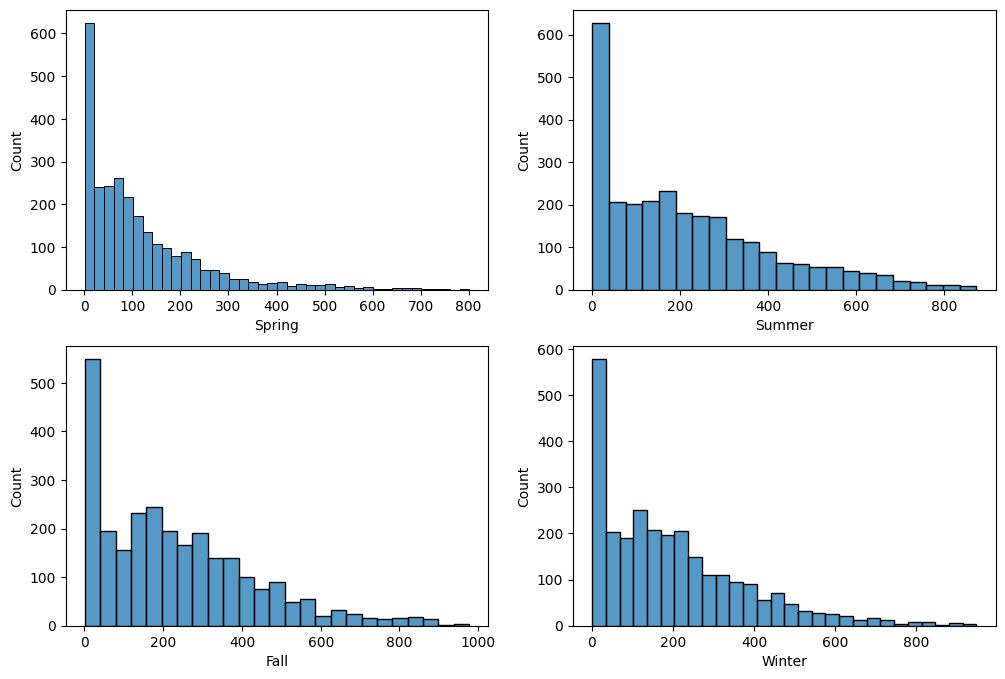

In [ ]:
seasons=[Spring,Summer,Fall,Winter]
season_list=["Spring","Summer","Fall","Winter"]

fig=plt.figure(figsize=(12,8))
for i in range(len(seasons)):
  plt.subplot(2,2,i+1)
  sns.histplot(data=seasons[i])
  plt.xlabel(season_list[i])
plt.show()

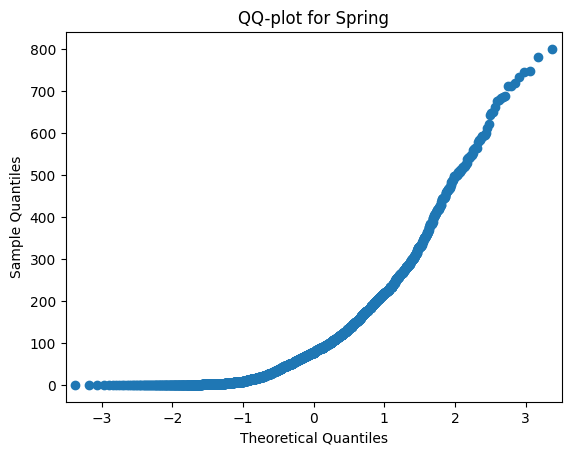

In [ ]:
sm.qqplot(data=Spring)
plt.title("QQ-plot for Spring")
plt.show()

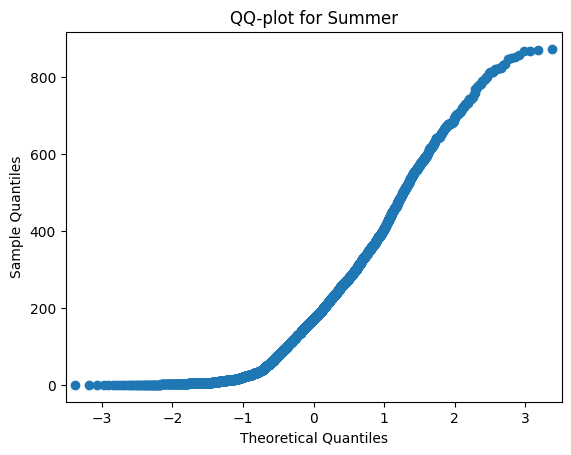

In [ ]:
sm.qqplot(data=Summer)
plt.title("QQ-plot for Summer")
plt.show()

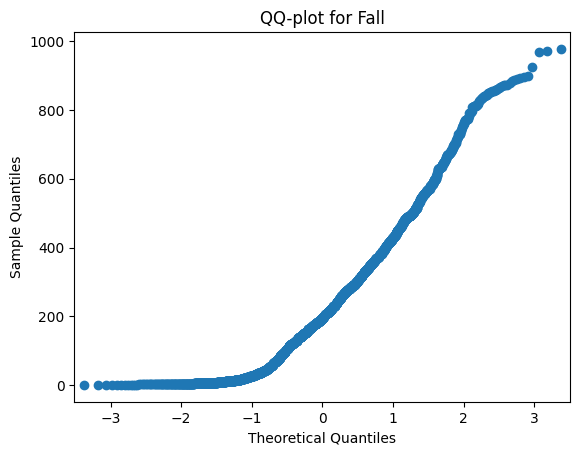

In [ ]:
sm.qqplot(data=Fall)
plt.title("QQ-plot for Fall")
plt.show()

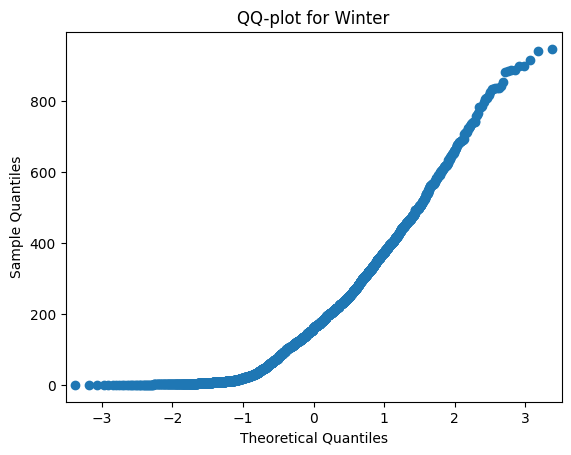

In [ ]:
sm.qqplot(data=Winter)
plt.title("QQ-plot for Winter")
plt.show()

In [ ]:
for i in range(len(seasons)):

  sharpiro_stats, p_value =stats.shapiro(seasons[i])
  print(f"p_value for {season_list[i]}:", p_value )
  skew=seasons[i].skew()
  print(f"Skewness for {season_list[i]}:",skew)
  kurt=seasons[i].kurtosis()
  print(f"Kurtosis for {season_list[i]}:",kurt,"\n")
  print()

p_value for Spring: 0.0
Skewness for Spring: 1.8880559001782309
Kurtosis for Spring: 4.31475739331681 


p_value for Summer: 6.039093315091269e-39
Skewness for Summer: 1.0032642267278118
Kurtosis for Summer: 0.42521337827415717 


p_value for Fall: 1.043458045587339e-36
Skewness for Fall: 0.9914946474772749
Kurtosis for Fall: 0.6993825795653992 


p_value for Winter: 1.1301682309549298e-39
Skewness for Winter: 1.172117329762622
Kurtosis for Winter: 1.2734853552995302 




In [ ]:
Levene_Result=stats.levene(Spring,Summer,Fall,Winter)
Levene_Result

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [ ]:
alpha=0.05
f_stat, p_value= stats.f_oneway(Spring,Summer,Fall,Winter)
print("F-test stats :",f_stat)
print("p_value      :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for different seasons.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for different seasons.")

F-test stats : 236.94671081032106
p_value      : 6.164843386499654e-149
Null Hypothesis Rejected. There is significant difference in number of bikes rented for different seasons.


In [ ]:
alpha=0.05
f_stat, p_value= stats.f_oneway(Spring,Summer,Fall)
print("F-test stats :",f_stat)
print("p_value      :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for Spring, Summer and Fall.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for Spring, Summer and Fall seasons.")

F-test stats : 355.02267843563595
p_value      : 1.467290597024614e-148
Null Hypothesis Rejected. There is significant difference in number of bikes rented for Spring, Summer and Fall.


While doing bivariate analysis, we found that the average number of bikes rented for Fall and Summer is close in comparison to others seasons.

We will try ttest to check the same.

In [ ]:
alpha=0.05
t_stat, p_value= stats.ttest_ind(Fall,Summer)
print("T-test stats :",t_stat)
print("p_value      :",p_value)

if p_value<alpha:
  print("Null Hypothesis Rejected. There is significant difference in number of bikes rented for Fall and Summer.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in \
  number of bikes rented for Fall and Summer seasons.")

T-test stats : 3.6407918229052068
p_value      : 0.00027431561172498644
Null Hypothesis Rejected. There is significant difference in number of bikes rented for Fall and Summer.


There is not enough evidence to prove that number of bikes rented for different seasons is same with 5% signifinance level even when we are considering only Fall and  Summer seasons.

We also dont have evidence to prove similarity in number of bikes rented for any two seasons.

Seasons have impact on number of bikes being rented.

### **Hypothesis Testing 4:**
If the Weather conditions are signiﬁcantly different during different Seasons.

**H0:  Weather conditions are same during different Seasons.**

**H1:  Weather conditions are signiﬁcantly different for atleast during one Season.**

We have to check whether each season has same weather conditions (same or almost equal number of respective different weather conditions in every season),
We will using chi-square test.

As chi-square is non-parametric test, there is no need to check normality and equality of variance.

In [ ]:
# if the Weather conditions are signiﬁcantly different during different Seasons?
contingency_table=pd.crosstab(df.season,df.weather)
print(contingency_table)
chi_stat, p_value, *_ =stats.chi2_contingency(contingency_table)

print("Chi-test stats for weather conditions and seasons :",chi_stat)
print("p_value for weather conditions and seasons        :",p_value)
alpha=0.05
if p_value<alpha:
  print("Null Hypothesis Rejected. Theres is significant difference in weather conditions in different seasons.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in weather conditions in different seasons.")

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0
Chi-test stats for weather conditions and seasons : 49.158655596893624
p_value for weather conditions and seasons        : 1.549925073686492e-07
Null Hypothesis Rejected. Theres is significant difference in weather conditions in different seasons.


In [ ]:
# Removing weather condition 4 (heavy rain and snow) as there is single entry for it.
df1_weather=df[df["weather"]!=4]
contingency_table=pd.crosstab(df1_weather.season,df1_weather.weather)
print(contingency_table)
chi_stat, p_value, *_ =stats.chi2_contingency(contingency_table)

print("Chi-test stats for weather conditions and seasons :",chi_stat)
print("p_value for weather conditions and seasons        :",p_value)
alpha=0.05
if p_value<alpha:
  print("Null Hypothesis Rejected. Theres is significant difference in respective weather conditions in different seasons.")
else:
  print("Fail to reject Null Hypothesis. There is not significant evidence to suggest difference in weather conditions in different seasons.")

weather     1    2    3
season                 
1        1759  715  211
2        1801  708  224
3        1930  604  199
4        1702  807  225
Chi-test stats for weather conditions and seasons : 46.10145731073249
p_value for weather conditions and seasons        : 2.8260014509929343e-08
Null Hypothesis Rejected. Theres is significant difference in respective weather conditions in different seasons.


Weather conditions are different for each seasons.

Bikes rentals differs for every season as well as for weather conditions (from above hypothesises).

Yulu should market its bikes based on monthly analysis. Bikes demand is highest for June in Summer season and July in Fall season.


Insights:

* The dataset has 10886 entries, 0 to 10885 with 12 columns with no duplicated rows or missing values.
* The number of day in datetime is till 19 only which is surprising.
* Only 3% of total days in dataset are holidays (festivies or natioanl holidays).\
* Weather condition 4 (Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog) is bad for bike travel and hence there is null contribution in bike renting as suspected.
* Fall is most revenue generating season followed by Summer season. For Fall season (months July , August and September), the number of bikes is higher than for other seasons. For Summer season, June is most contributing month.
* In mornings, 8 am is busiest hour (office start time). For noon and afternoon period, average traffic is there. From 5 pm, the traffic starts increasing again with peak hours 5 pm and 6 pm.
* Bikes rentals is almost same for working day and holiday(weekend included) with 95% confidence.
* Every weather condition has impact on number of bikes being rented. We dont have evidence to prove similarity in number of bikes rented for any two weather conditions.
* Seasons have impact on number of bikes being rented.  Number of bikes rented for different seasons is not same with 5% signifinance level even when we are considering Fall and Summer seasons.
* Weather conditions are different for each seasons.

### Recommendations:

1. Strategic Maintenance Scheduling:

  * Data-Driven Approach: Leverage data on rental patterns to identify off-peak hours (e.g., 12 am - 5 am) with minimal demand.
  * Preventative Maintenance: Schedule bike maintenance during these off-peak periods to minimize disruptions and maximize vehicle availability during peak hours (6 am - 12 am midnight).
2. Seasonal Marketing Strategies:

  * Targeted Campaigns: Increase marketing efforts during Spring, when bike rentals are historically lower. Develop campaigns that incentivize ridership during this season.
  * Data-Driven Insights: Utilize rental data to pinpoint specific peak seasons and tailor promotions accordingly.
3. Adverse Weather Solutions:

  * Alternative Options: Explore the possibility of offering electric cars or covered vehicles as alternatives during harsh weather conditions when bike rentals are minimal.
  * Increased Rider Safety: Implement safety measures and communication strategies to educate riders on best practices for cycling in various weather conditions.
4. Community Engagement and Awareness:

  * Health-Focused Initiatives: Organize cycling marathons and other health-based promotional events to promote cycling and Yulu's services within the general population.
  * Public Partnerships: Partner with local authorities to set up e-bike stations near key public transportation hubs (metro stations, bus stations, railway stations) and prime work locations, improving accessibility and user convenience.
5. Corporate Partnerships:

  * Targeted Acquisition: Develop strategic partnerships with large companies (FAANG, BIG 4, etc.) to onboard corporate customers and cater to employee transportation needs.
  * Subscription Options: Explore offering corporate subscription plans for employee commutes.
6. Brand Visibility and Engagement:

  * Regular Track Cycling Events: Organize promotional track cycling events on weekends or holidays to increase brand visibility and attract new users.
Social Media Strategy: Utilize social media platforms to engage with users, promote upcoming events, and showcase the benefits of electric bike riding.

###Benefits:

By implementing these data-driven recommendations, Yulu can:

* Improve Operational Efficiency: Minimize service disruptions and maintain vehicle availability.
* Optimize Marketing Efforts: Target marketing campaigns to specific seasons and demographics.
* Increase User Base and Revenue: Attract new riders and drive profitable growth.
* Enhance Brand Image: Position Yulu as a leader in sustainable urban transportation.